In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
from utils import read_excel_sheet, label_encode
from task_9.generic_eda import GenericEDA
from task_24.task_24 import normalize_date_column, rename_columns_from_file, merge_dataframes_left_join, append_rehospitalized_status_to_patients
from task_24.patient_stas import process_rehospitalization_data
from hospital_models.generic_torch_model import ClassificationPipeline, ClassificationVisualization

In [2]:
# Move to src directory
src_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

In [3]:
# Construct the full path to the file
file_absolute_path = os.path.join(src_dir, "data/rehospitalization.xlsx")
df = read_excel_sheet(file_absolute_path, "hospitalization1")

# Task 9 - Hospitalization 1 EDA

In [4]:
# Path to the translation_file
rehospitalization1_columns_file = os.path.join(src_dir, "team_1/translations/hospitalization1.json")
eda = GenericEDA(df, translation_file=rehospitalization1_columns_file)

In [5]:
eda.show_info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7033 entries, 0 to 7032
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Patient                   7033 non-null   int64         
 1   department_id             7033 non-null   int64         
 2   Admission_Medical_Record  7033 non-null   int64         
 3   Admission_Entry_Date      7033 non-null   datetime64[ns]
 4   Release_Date              7033 non-null   datetime64[ns]
 5   reception_type            6969 non-null   object        
 6   patient_origin            7033 non-null   object        
 7   Release_Type              7033 non-null   object        
 8   release_doctor_code       6919 non-null   float64       
 9   hospitalization_duration  7033 non-null   int64         
 10  admission_diagnoses       6572 non-null   object        
 11  release_diagnoses         7004 non-null   object        
dtyp

In [6]:
eda.show_summary_statistics()

Summary Statistics (Numerical):
            Patient  department_id  Admission_Medical_Record  \
count  7.033000e+03    7033.000000              7.033000e+03   
mean   3.321263e+05       2.940708              5.668914e+06   
std    3.178396e+05       1.411208              1.036855e+06   
min    3.100000e+01       1.000000              3.873037e+06   
25%    7.352200e+04       2.000000              4.780833e+06   
50%    2.059390e+05       3.000000              5.736045e+06   
75%    5.566750e+05       4.000000              6.594632e+06   
max    1.171452e+06       5.000000              7.333694e+06   

       release_doctor_code  hospitalization_duration  
count          6919.000000               7033.000000  
mean          10169.482295                  3.198777  
std            2925.033899                  3.710708  
min            1052.000000                 -1.000000  
25%           10112.000000                  1.000000  
50%           11119.000000                  2.000000  
75%   

In [7]:
eda.check_missing_values()

Missing Values in Each Column:
reception_type          64
release_doctor_code    114
admission_diagnoses    461
release_diagnoses       29
dtype: int64




**Cleaning nan values by logic**

In [8]:
# Clean NaN values for the missing columns, fill missing values with frequent value (mode)
for column in ['reception_type','release_doctor_code' ,'admission_diagnoses', 'release_diagnoses']:
    eda.clean_nan(column=column, fill_value=None)

Missing values in 'reception_type' have been filled with דחוף.
Missing values in 'release_doctor_code' have been filled with 6888.0.
Missing values in 'admission_diagnoses' have been filled with 78609.
Missing values in 'release_diagnoses' have been filled with 7865.


In [9]:
eda.check_missing_values()

Missing Values in Each Column:
Series([], dtype: int64)




In [10]:
eda.show_unique_values()

Unique values in 'Patient':
31075     53
354573    23
65151     14
3523      13
34605     13
          ..
590181     1
790490     1
6181       1
801748     1
431801     1
Name: Patient, Length: 4515, dtype: int64


Unique values in 'department_id':
1    1582
4    1582
3    1392
2    1263
5    1214
Name: department_id, dtype: int64


Unique values in 'Admission_Medical_Record':
5207766    1
4638165    1
4684750    1
6659199    1
6194540    1
          ..
7240838    1
6422712    1
7232954    1
6810555    1
7229378    1
Name: Admission_Medical_Record, Length: 7033, dtype: int64


Unique values in 'Admission_Entry_Date':
2021-09-04 22:21:04.440    1
2021-01-10 05:03:11.557    1
2021-01-29 21:15:59.523    1
2023-04-01 01:39:41.437    1
2022-09-24 02:36:33.567    1
                          ..
2023-11-26 15:30:32.170    1
2022-12-29 22:00:43.417    1
2023-11-22 18:41:23.047    1
2023-06-05 14:00:02.710    1
2023-11-21 16:22:11.033    1
Name: Admission_Entry_Date, Length: 7033, dtype: int64



/home/ran/Github-projects/data-science2-lab-final-project/src/team_1/task_9/generic_eda.py:100: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = self.df.corr()


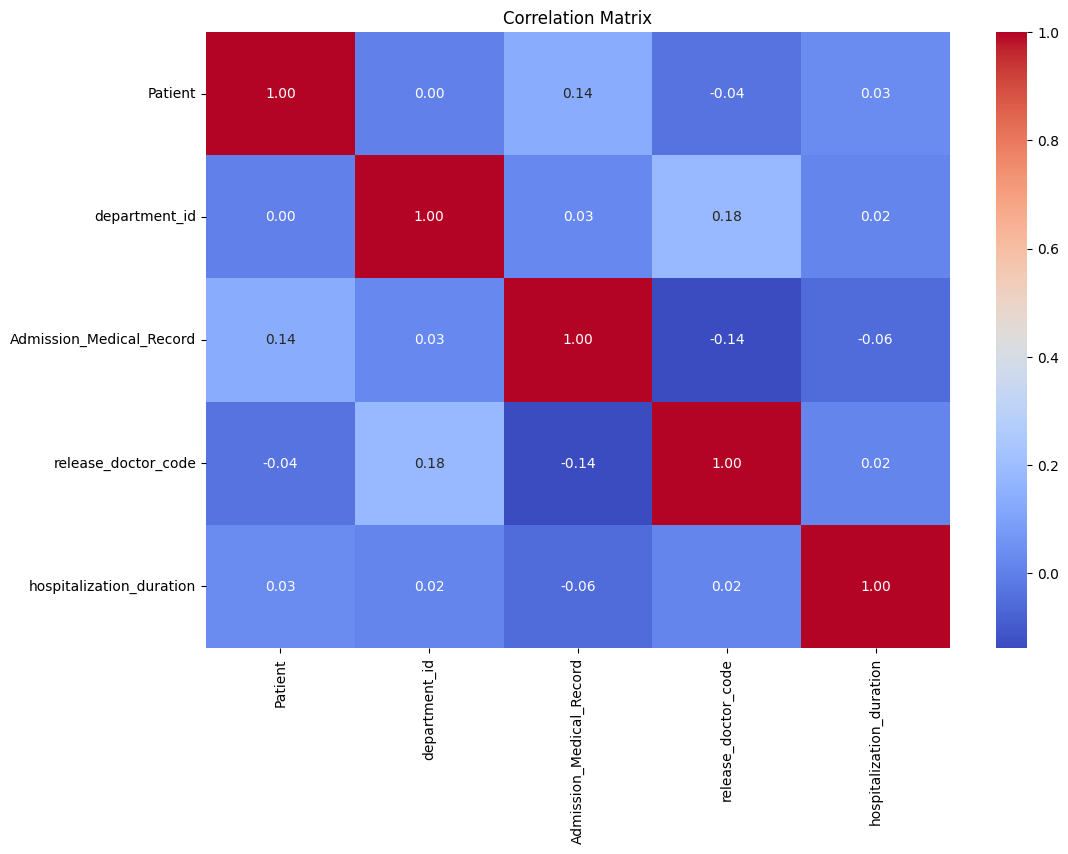

In [11]:
eda.plot_correlation_matrix()

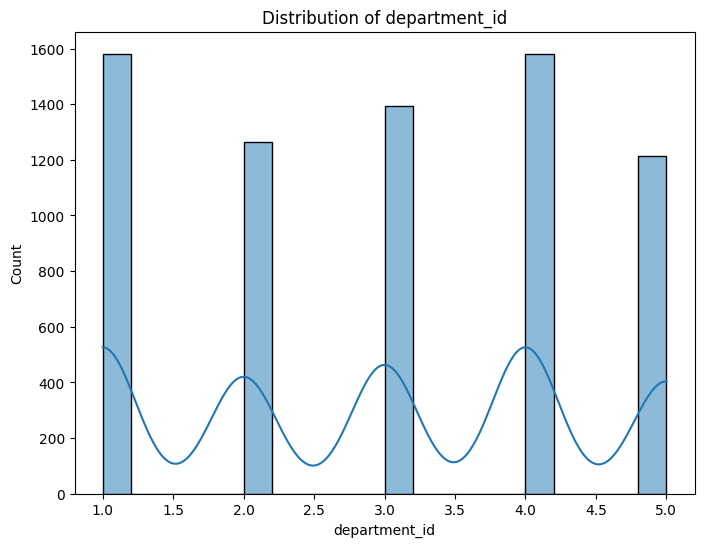

In [12]:
# Cell 5: Plot distribution of a numerical column
eda.plot_distribution('department_id')

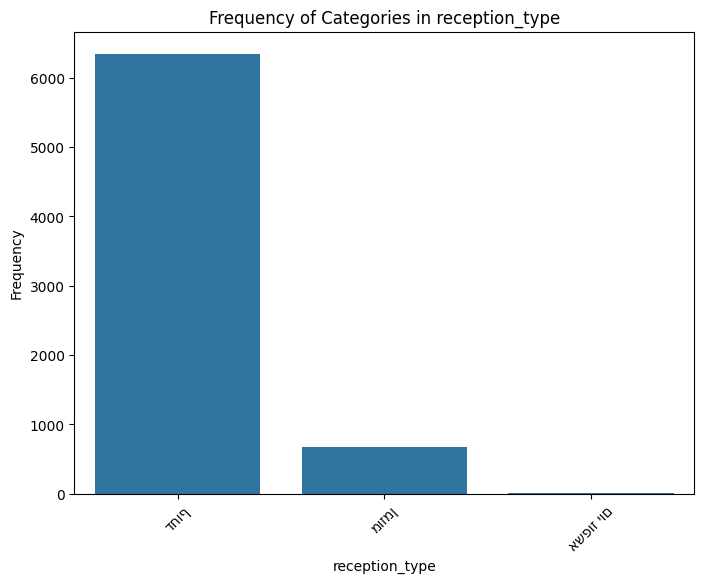

In [13]:
# Plot frequency of a categorical column
eda.plot_categorical_frequency('reception_type')

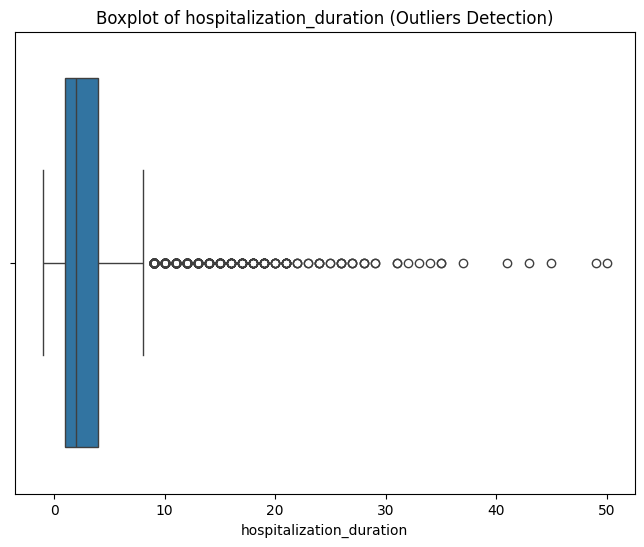

In [14]:
# Cell 6: Detect outliers in a numerical column using a boxplot
eda.detect_outliers('hospitalization_duration')

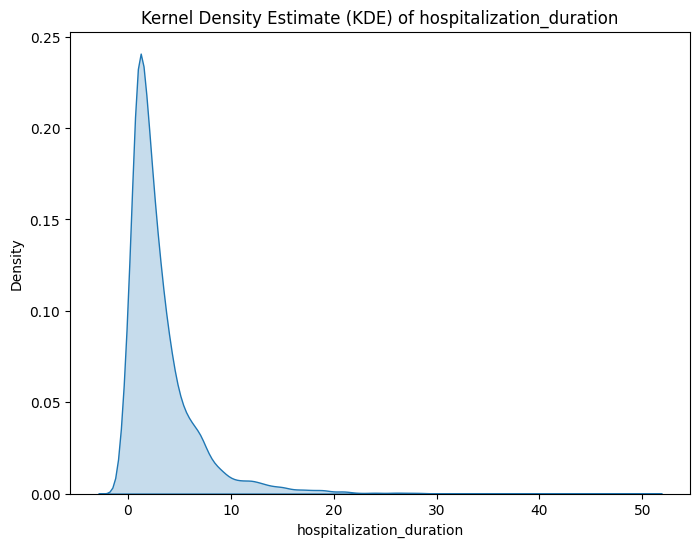

In [15]:
# Cell 7: Plot a Kernel Density Estimate (KDE) for a numerical column
eda.plot_kde_numerical('hospitalization_duration')

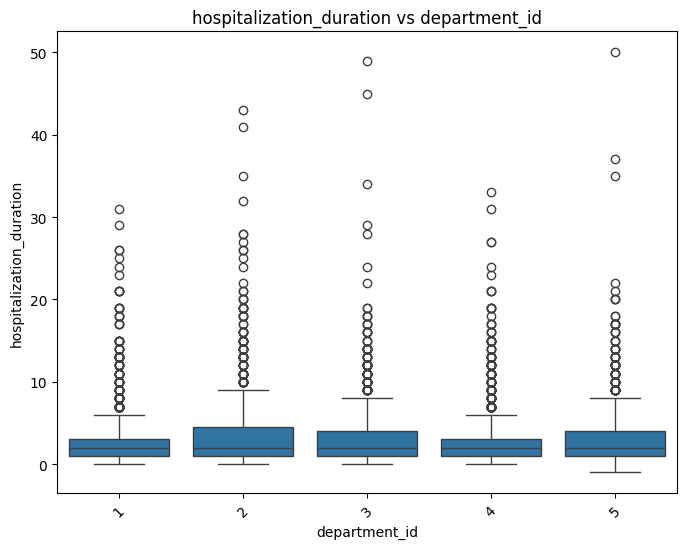

In [16]:
# Cell 8: Visualize the relationship between a numerical and categorical column
eda.plot_numeric_vs_categorical('hospitalization_duration', 'department_id')

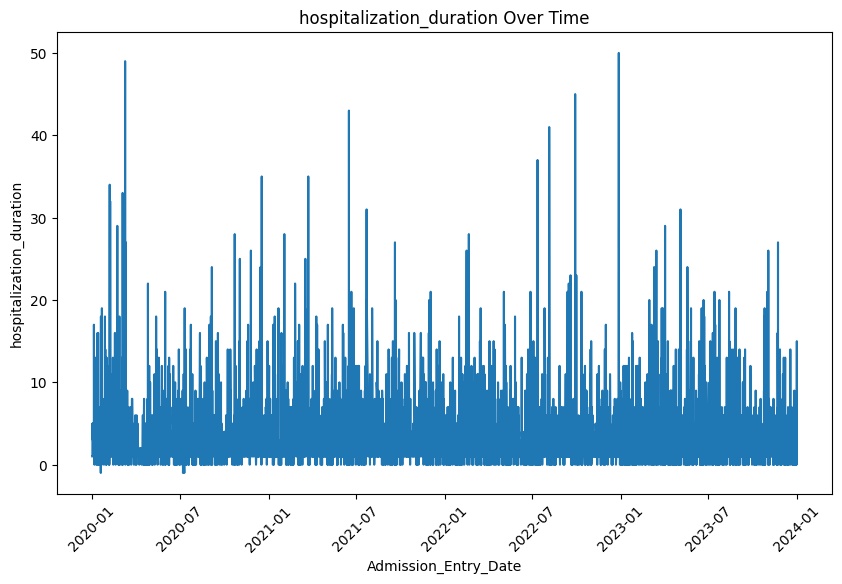

In [17]:
# Cell 10: Plot numerical column over time
eda.plot_numeric_over_time('hospitalization_duration', 'Admission_Entry_Date')

### Exporting clean data as csv to Data folder

In [19]:
rehospitalization1_csv_filename = os.path.join(src_dir, "data/hospitalization1.csv")
eda.export_to_csv(file_path=rehospitalization1_csv_filename)

Data exported successfully to /home/ran/Github-projects/data-science2-lab-final-project/src/data/hospitalization1.csv


# ---------------- END EDA -----------------------------

<br><br>

## TASK 24 

# Correlation Department occupancy and rehospitalization

In [3]:
# Construct the full path to the file
file_absolute_path = os.path.join(src_dir, "data/rehospitalization.xlsx")
department_df = read_excel_sheet(file_absolute_path, "unitsOccupancyRate")

renmae columns hebrew to english

In [4]:
department_df = rename_columns_from_file(department_df, os.path.join(src_dir, "team_1", "translations", "unitsOccupancyRate.json"))

In [5]:
department_df.head()

,date,department_id,occupancy_count,occupancy_rate
0,2020-01-01 07:00:00,4,31,0.775
1,2020-01-01 07:00:00,2,30,0.750
2,2020-01-01 07:00:00,5,40,1.000
3,2020-01-01 07:00:00,1,32,0.800
4,2020-01-01 07:00:00,3,37,0.925


In [6]:
department_df.isna().sum()

date               0
department_id      0
occupancy_count    0
occupancy_rate     0
dtype: int64

**No null values in deparment df**

In [7]:
hospitalization1 = pd.read_csv(os.path.join(src_dir, "data/hospitalization1.csv"))

In [8]:
hospitalization1.head()

,Patient,department_id,Admission_Medical_Record,Admission_Entry_Date,Release_Date,reception_type,patient_origin,Release_Type,release_doctor_code,hospitalization_duration,admission_diagnoses,release_diagnoses
0,62051,1,5207766,2021-09-04 22:21:04.440,2021-09-08 14:43:00,דחוף,מביתו,שוחרר לביתו,6878.0,4,42731,42731
1,951769,2,5605505,2022-02-15 14:39:02.220,2022-02-16 13:37:00,דחוף,אחר,שוחרר לביתו,12615.0,1,Z3601,Z3601
2,863707,2,6755794,2023-05-15 04:21:09.137,2023-05-15 15:59:00,דחוף,מביתו,שוחרר לביתו,12599.0,0,7895,7895
3,884200,3,6964052,2023-07-27 08:16:48.640,2023-07-28 17:34:00,דחוף,ממוסד,שוחרר לביתו,11582.0,1,78609,"4919 , 78609"
4,936226,4,7023187,2023-08-20 19:44:35.410,2023-08-21 15:47:00,דחוף,מביתו,שוחרר לביתו,12359.0,1,78609,"78609 , 81203 , 83100"


## Append hospitalization status to each patient

This will help us find Patients time in hospitalization, number of repeated hospitalizations etc'

In [9]:
# Process the rehospitalization data
processed_df = process_rehospitalization_data(df=hospitalization1, patient_col='Patient', admission_col='Admission_Entry_Date', release_col='Release_Date')

/home/ran/Github-projects/data-science2-lab-final-project/src/team_1/task_24/patient_stas.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duration["duration_classification"] = df_duration[duration_col].apply(


**normalize date columns**

In [10]:
for date_col in ['Admission_Entry_Date', 'Release_Date']:
    processed_df[date_col] = normalize_date_column(processed_df, column_name=date_col)

department_df['date'] = normalize_date_column(department_df, column_name='date')

/tmp/ipykernel_119402/532873034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df[date_col] = normalize_date_column(processed_df, column_name=date_col)
/tmp/ipykernel_119402/532873034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df[date_col] = normalize_date_column(processed_df, column_name=date_col)


# Left join Dataframes on department and date

In [11]:
# Assuming 'patient_id' is the common key
left_table_columns = ['department_id', 'Admission_Entry_Date']
right_table_columns = ['department_id', 'date']
df_combined = merge_dataframes_left_join(processed_df, department_df, left_table_columns=left_table_columns, right_table_columns=right_table_columns)

In [12]:
df_combined.head()

,Patient,department_id,Admission_Medical_Record,Admission_Entry_Date,Release_Date,reception_type,patient_origin,Release_Type,release_doctor_code,hospitalization_duration,admission_diagnoses,release_diagnoses,hospitalization_count,previous_release,duration_between_hospitalizations,duration_classification,date,occupancy_count,occupancy_rate
0,31,4,4298122,2020-07-31,2020-07-31,דחוף,מביתו,שוחרר לביתו,10779.0,0,42731,42731,2,2020-07-27 18:01:00,3.0,short,2020-07-31,30.0,0.750
1,184,2,6245307,2022-10-21,2022-10-23,דחוף,מביתו,שוחרר לביתו,11515.0,2,7865,7865,2,2022-10-11 12:39:00,10.0,medium,2022-10-21,31.0,0.775
2,305,1,3905672,2020-01-16,2020-01-23,דחוף,מביתו,שוחרר לביתו,6892.0,7,"78060 , 78609",78609,4,2020-01-06 14:57:00,9.0,medium,2020-01-16,37.0,0.925
3,305,1,3951517,2020-02-04,2020-02-05,דחוף,מביתו,שוחרר לביתו,10762.0,1,78609,78609,4,2020-01-23 13:59:00,12.0,medium,2020-02-04,40.0,1.000
4,305,1,3958841,2020-02-07,2020-02-11,דחוף,מביתו,שוחרר לביתו,7993.0,4,78609,78609,4,2020-02-05 14:06:00,2.0,short,2020-02-07,27.0,0.675


## Correlation Rehospitalization - Department

Now we have all the data

### Per department Analysis

Department 4 correlation between occupancy rate and hospitalization_duration: -0.03729969988390639


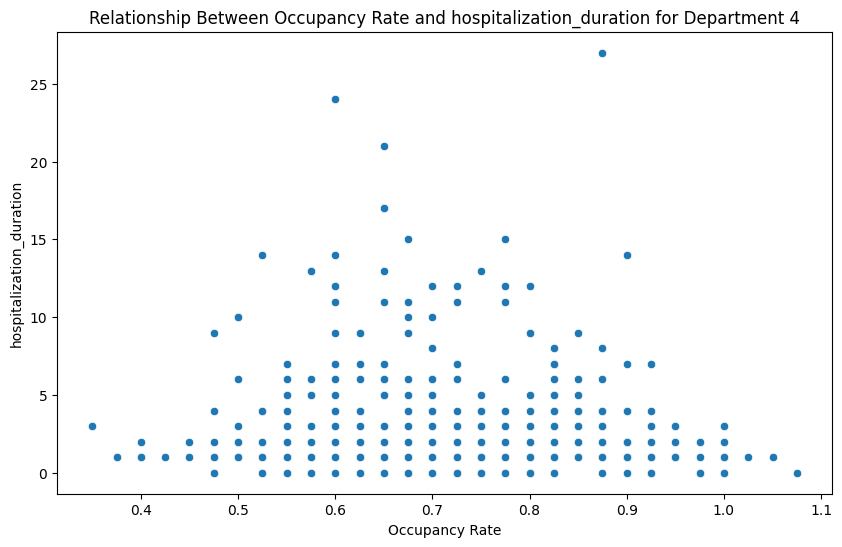

Department 2 correlation between occupancy rate and hospitalization_duration: -0.03324677718846985


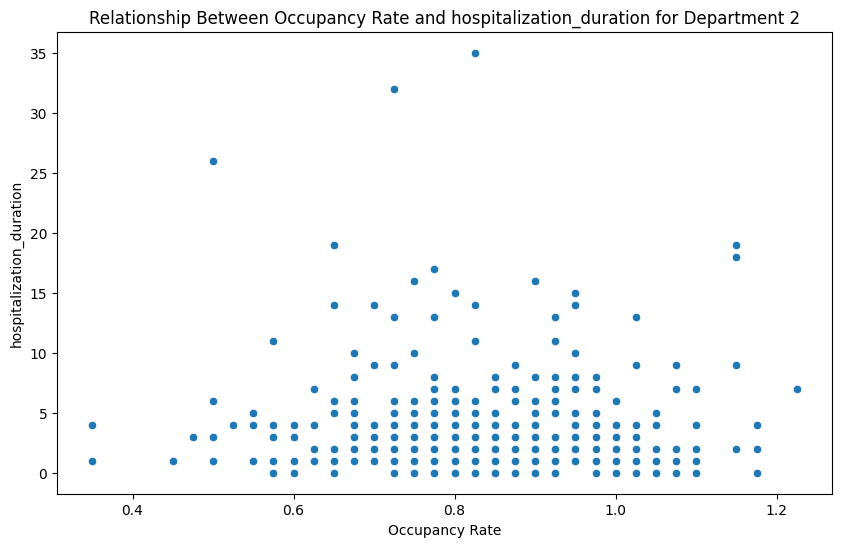

Department 1 correlation between occupancy rate and hospitalization_duration: 0.019184962201700493


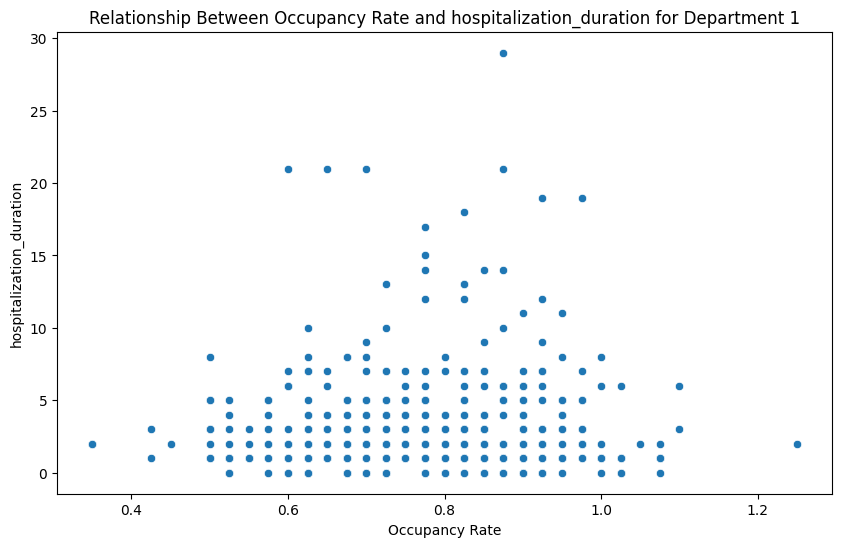

Department 3 correlation between occupancy rate and hospitalization_duration: -0.0009456545988343702


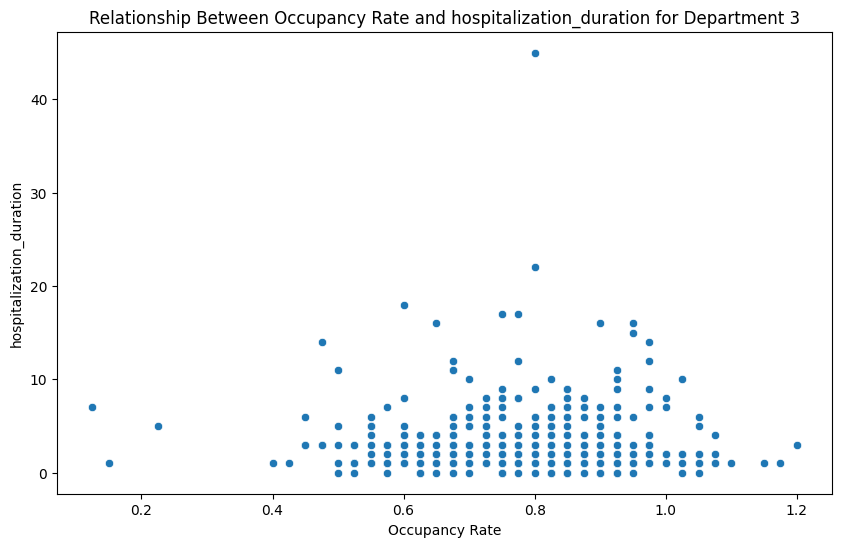

Department 5 correlation between occupancy rate and hospitalization_duration: -0.004991452197588858


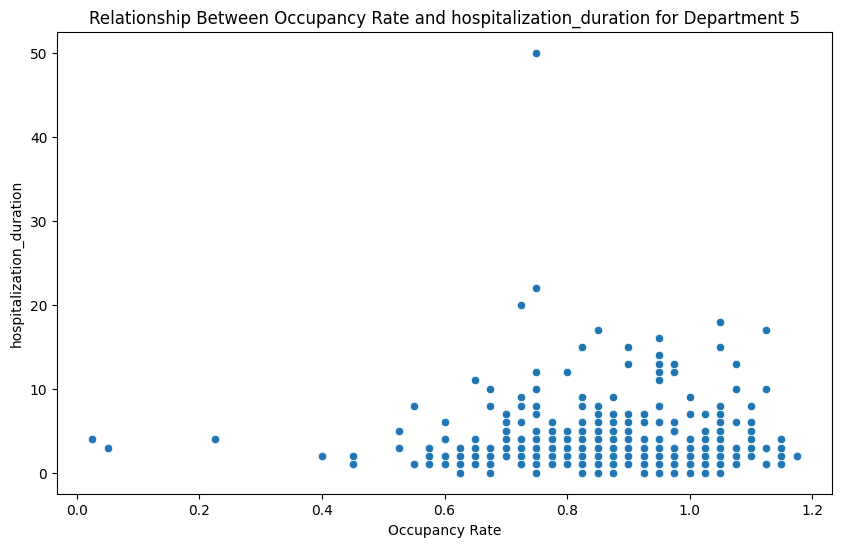

In [13]:
department_correlations = {}

for dept in df_combined['department_id'].unique():
    dept_data = df_combined[df_combined['department_id'] == dept]
    correlation = dept_data['occupancy_rate'].corr(dept_data['hospitalization_duration'])
    department_correlations[dept] = correlation
    print(f"Department {dept} correlation between occupancy rate and hospitalization_duration: {correlation}")

    # Visualize the relationship for this department
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='occupancy_rate', y='hospitalization_duration', data=dept_data)
    plt.title(f'Relationship Between Occupancy Rate and hospitalization_duration for Department {dept}')
    plt.xlabel('Occupancy Rate')
    plt.ylabel('hospitalization_duration')
    plt.show()

# Classifier for rehospitalization based on department occupancy

In [14]:
# remove nan rows
df_combined_classifier = df_combined.dropna()
df_combined_classifier.head(2)

,Patient,department_id,Admission_Medical_Record,Admission_Entry_Date,Release_Date,reception_type,patient_origin,Release_Type,release_doctor_code,hospitalization_duration,admission_diagnoses,release_diagnoses,hospitalization_count,previous_release,duration_between_hospitalizations,duration_classification,date,occupancy_count,occupancy_rate
0,31,4,4298122,2020-07-31,2020-07-31,דחוף,מביתו,שוחרר לביתו,10779.0,0,42731,42731,2,2020-07-27 18:01:00,3.0,short,2020-07-31,30.0,0.750
1,184,2,6245307,2022-10-21,2022-10-23,דחוף,מביתו,שוחרר לביתו,11515.0,2,7865,7865,2,2022-10-11 12:39:00,10.0,medium,2022-10-21,31.0,0.775


In [15]:
# Assuming df is your pandas DataFrame that contains features and a target column
# Example features: ['age', 'gender_encoded', 'hospitalization_count']
# Example target: 'duration_classification'

# Create a pipeline with features and target
pipeline = ClassificationPipeline(
    df=df_combined_classifier,
    features=['occupancy_count', 'occupancy_rate', 'hospitalization_duration'],
    target='duration_classification',
)

In [16]:
# Prepare the data
X_train, X_test, y_train, y_test = pipeline.prepare_data()

# ensure 3 classes (short, medium, long)
pipeline.num_classes

3

In [17]:
# Train the model
input_size = X_train.shape[1]  # Number of features
model = pipeline.train_model(
    X_train, y_train, input_size, num_classes=pipeline.num_classes, num_epochs=5000
)

Epoch [10/5000], Loss: 1.0967
Epoch [20/5000], Loss: 1.0948
Epoch [30/5000], Loss: 1.0942
Epoch [40/5000], Loss: 1.0935
Epoch [50/5000], Loss: 1.0929
Epoch [60/5000], Loss: 1.0923
Epoch [70/5000], Loss: 1.0919
Epoch [80/5000], Loss: 1.0915
Epoch [90/5000], Loss: 1.0912
Epoch [100/5000], Loss: 1.0909
Epoch [110/5000], Loss: 1.0905
Epoch [120/5000], Loss: 1.0902
Epoch [130/5000], Loss: 1.0898
Epoch [140/5000], Loss: 1.0894
Epoch [150/5000], Loss: 1.0891
Epoch [160/5000], Loss: 1.0888
Epoch [170/5000], Loss: 1.0885
Epoch [180/5000], Loss: 1.0883
Epoch [190/5000], Loss: 1.0880
Epoch [200/5000], Loss: 1.0878
Epoch [210/5000], Loss: 1.0875
Epoch [220/5000], Loss: 1.0873
Epoch [230/5000], Loss: 1.0871
Epoch [240/5000], Loss: 1.0870
Epoch [250/5000], Loss: 1.0868
Epoch [260/5000], Loss: 1.0868
Epoch [270/5000], Loss: 1.0867
Epoch [280/5000], Loss: 1.0866
Epoch [290/5000], Loss: 1.0866
Epoch [300/5000], Loss: 1.0865
Epoch [310/5000], Loss: 1.0865
Epoch [320/5000], Loss: 1.0865
Epoch [330/5000],

In [18]:
# Evaluate the model
pipeline.evaluate_model(model, X_test, y_test)

              precision    recall  f1-score   support

           0       0.34      0.33      0.34       265
           1       0.32      0.24      0.27       233
           2       0.38      0.47      0.42       257

    accuracy                           0.35       755
   macro avg       0.35      0.35      0.34       755
weighted avg       0.35      0.35      0.35       755



### Model result Visuals

In [46]:
class_names = ['Short', 'Medium', 'Long']

# Create the visualization object
vis = ClassificationVisualization()


In [19]:
# Assuming y_test and y_pred are already computed
model.model.eval()
with torch.no_grad():
    outputs = model.forward(X_test)
    _, y_pred = torch.max(outputs.data, 1)


/home/ran/Github-projects/data-science2-lab-final-project/src/team_1/hospital_models/generic_torch_model.py:207: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_true, palette="viridis")
/home/ran/Github-projects/data-science2-lab-final-project/src/team_1/hospital_models/generic_torch_model.py:215: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette="viridis")


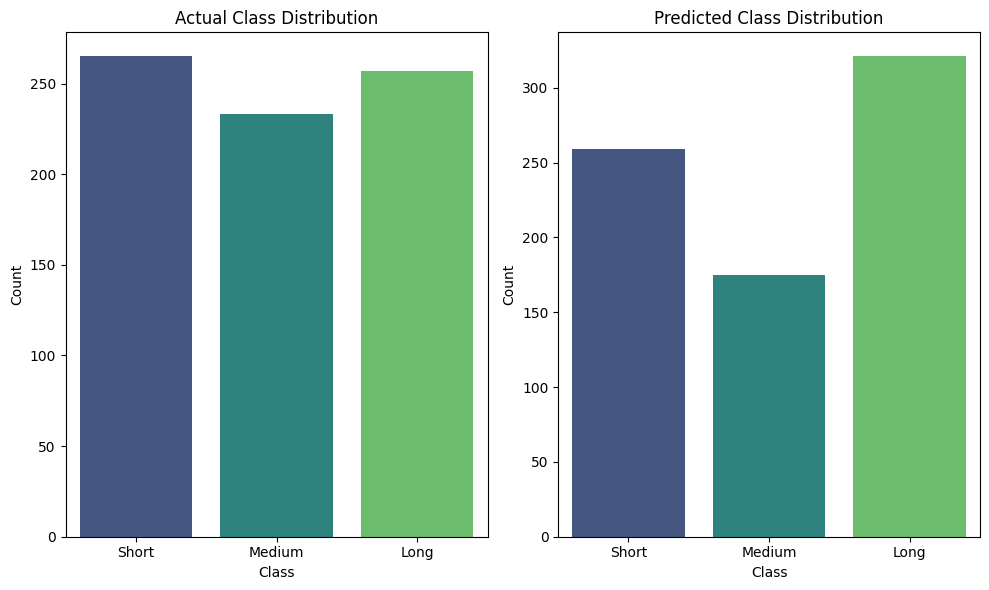

In [20]:
# Plot countplot for actual vs predicted class distribution
vis.plot_countplot(y_test, y_pred, class_names)

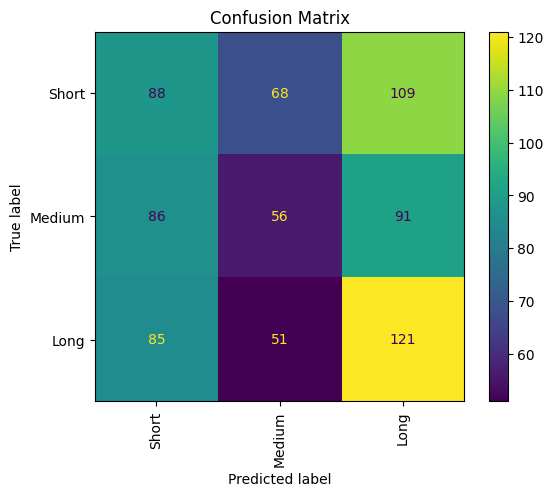

In [21]:
# Plot confusion matrix
vis.plot_confusion_matrix(y_test, y_pred, class_names)

# -------------- END Task 24 - department to rehospital Model -------------------------------

<br><br><br>

# Task 26 Age & Gender to hospitalization model

In [3]:
# Construct the full path to the file
file_absolute_path = os.path.join(src_dir, "data/rehospitalization.xlsx")
general_data = read_excel_sheet(file_absolute_path, "GeneralData")

In [7]:
general_data_eda = GenericEDA(general_data, translation_file=os.path.join(src_dir, "team_1", "translations", "GeneralData.json"))

In [10]:
general_data_eda.check_missing_values()

Missing Values in Each Column:
income_source           11
weight                 817
height                 837
BMI                   1031
education             1894
number_of_children     162
marital_status          61
medications             40
dtype: int64




In [11]:
general_data_eda.show_info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4535 entries, 0 to 4534
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient             4535 non-null   int64  
 1   age                 4535 non-null   int64  
 2   Gender              4535 non-null   object 
 3   income_source       4524 non-null   object 
 4   weight              3718 non-null   float64
 5   height              3698 non-null   float64
 6   BMI                 3504 non-null   float64
 7   illnesses           4535 non-null   int64  
 8   education           2641 non-null   object 
 9   number_of_children  4373 non-null   object 
 10  marital_status      4474 non-null   object 
 11  medications         4495 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 425.3+ KB
None




**fill missing values for general data**

In [13]:
for col in ['income_source', 'weight', 'height','BMI','education','number_of_children','marital_status','medications']:
    general_data_eda.clean_nan(col)

Missing values in 'income_source' have been filled with כללית.
Missing values in 'weight' have been filled with 70.0.
Missing values in 'height' have been filled with 160.0.
Missing values in 'BMI' have been filled with 24.2.
Missing values in 'education' have been filled with פנסיונר.
Missing values in 'number_of_children' have been filled with 3.
Missing values in 'marital_status' have been filled with נשוי.
Missing values in 'medications' have been filled with 6720.


In [14]:
general_data_eda.check_missing_values()

Missing Values in Each Column:
Series([], dtype: int64)




In [15]:
clean_general_data = general_data_eda.df

In [17]:
clean_general_data.head(2)

,Patient,age,Gender,income_source,weight,height,BMI,illnesses,education,number_of_children,marital_status,medications
0,1043772,84,זכר,כללית,92.0,170.0,34.2,1,ללא,3,נשוי,"10815 , 11282 , 1183 , 1196 , 12758 , 13027 ,..."
1,77493,89,נקבה,‎ממון עצמי-לא מב‎,45.0,150.0,21.4,0,פנסיונר,1,גרוש,"10337 , 1130 , 1448 , 1466 , 186 , 2482 , 290..."


In [16]:
hospitalization1 = pd.read_csv(os.path.join(src_dir, "data/hospitalization1.csv"))

In [21]:
# Add duration classification
processed_df = process_rehospitalization_data(df=hospitalization1, patient_col='Patient', admission_col='Admission_Entry_Date', release_col='Release_Date')

/home/ran/Github-projects/data-science2-lab-final-project/src/team_1/task_24/patient_stas.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duration["duration_classification"] = df_duration[duration_col].apply(


**merge on patient**

In [25]:
# Assuming 'patient_id' is the common key
left_table_columns = ['Patient']
right_table_columns = ['Patient']
df_combined_26 = merge_dataframes_left_join(processed_df, clean_general_data, left_table_columns=left_table_columns, right_table_columns=right_table_columns)

In [27]:
df_combined_26.head(2)

,Patient,department_id,Admission_Medical_Record,Admission_Entry_Date,Release_Date,reception_type,patient_origin,Release_Type,release_doctor_code,hospitalization_duration,...,Gender,income_source,weight,height,BMI,illnesses,education,number_of_children,marital_status,medications
0,31,4,4298122,2020-07-31 03:17:42.087,2020-07-31 15:45:00,דחוף,מביתו,שוחרר לביתו,10779.0,0,...,נקבה,מכבי,58.0,160.0,23.4,0,לא עובדת,1,אלמן,"11240 , 2188 , 2606 , 2690 , 2765 , 3633 , 38..."
1,184,2,6245307,2022-10-21 20:40:30.750,2022-10-23 15:50:00,דחוף,מביתו,שוחרר לביתו,11515.0,2,...,זכר,כללית,78.0,167.0,28.0,0,פנסיונר,1,נשוי,"1333 , 1530 , 2187 , 2188 , 2213 , 2214 , 260..."


In [28]:
df_combined_26.isna().sum()

Patient                              0
department_id                        0
Admission_Medical_Record             0
Admission_Entry_Date                 0
Release_Date                         0
reception_type                       0
patient_origin                       0
Release_Type                         0
release_doctor_code                  0
hospitalization_duration             0
admission_diagnoses                  0
release_diagnoses                    0
hospitalization_count                0
previous_release                     0
duration_between_hospitalizations    0
duration_classification              0
age                                  0
Gender                               0
income_source                        0
weight                               0
height                               0
BMI                                  0
illnesses                            0
education                            0
number_of_children                   0
marital_status           

In [31]:
# Step 1: Define the bins and bin the age column, save the bin ranges to a variable
age_bins = [0, 30, 60, 90, 120]
df_combined_26['age_binned'], bin_edges = pd.cut(df_combined_26['age'], bins=age_bins, labels=False, retbins=True)

In [33]:
df_combined_26.head(2)

,Patient,department_id,Admission_Medical_Record,Admission_Entry_Date,Release_Date,reception_type,patient_origin,Release_Type,release_doctor_code,hospitalization_duration,...,income_source,weight,height,BMI,illnesses,education,number_of_children,marital_status,medications,age_binned
0,31,4,4298122,2020-07-31 03:17:42.087,2020-07-31 15:45:00,דחוף,מביתו,שוחרר לביתו,10779.0,0,...,מכבי,58.0,160.0,23.4,0,לא עובדת,1,אלמן,"11240 , 2188 , 2606 , 2690 , 2765 , 3633 , 38...",2
1,184,2,6245307,2022-10-21 20:40:30.750,2022-10-23 15:50:00,דחוף,מביתו,שוחרר לביתו,11515.0,2,...,כללית,78.0,167.0,28.0,0,פנסיונר,1,נשוי,"1333 , 1530 , 2187 , 2188 , 2213 , 2214 , 260...",2


## Pre process feautres

**We will use only relevant features**

In [40]:
categorial_features = ['Gender', 'income_source', 'education']
numeric_features = ['age_binned', 'weight', 'height', 'BMI', 'hospitalization_duration', 'illnesses']

In [41]:
df_combined_26 = label_encode(df=df_combined_26, columns=categorial_features)

In [42]:
# set task feature
task_26_features = numeric_features + categorial_features

# Create a pipeline with features and target
pipeline = ClassificationPipeline(
    df=df_combined_26,
    features=task_26_features,
    target='duration_classification',
)

In [43]:
# Prepare the data
X_train, X_test, y_train, y_test = pipeline.prepare_data()

# ensure 3 classes (short, medium, long)
pipeline.num_classes

3

In [44]:
# Train the model
input_size = X_train.shape[1]  # Number of features
model = pipeline.train_model(
    X_train, y_train, input_size, num_classes=pipeline.num_classes, num_epochs=5000
)

Epoch [10/5000], Loss: 1.0956
Epoch [20/5000], Loss: 1.0897
Epoch [30/5000], Loss: 1.0851
Epoch [40/5000], Loss: 1.0824
Epoch [50/5000], Loss: 1.0807
Epoch [60/5000], Loss: 1.0794
Epoch [70/5000], Loss: 1.0781
Epoch [80/5000], Loss: 1.0771
Epoch [90/5000], Loss: 1.0761
Epoch [100/5000], Loss: 1.0753
Epoch [110/5000], Loss: 1.0744
Epoch [120/5000], Loss: 1.0732
Epoch [130/5000], Loss: 1.0722
Epoch [140/5000], Loss: 1.0712
Epoch [150/5000], Loss: 1.0702
Epoch [160/5000], Loss: 1.0693
Epoch [170/5000], Loss: 1.0686
Epoch [180/5000], Loss: 1.0680
Epoch [190/5000], Loss: 1.0672
Epoch [200/5000], Loss: 1.0667
Epoch [210/5000], Loss: 1.0662
Epoch [220/5000], Loss: 1.0658
Epoch [230/5000], Loss: 1.0652
Epoch [240/5000], Loss: 1.0648
Epoch [250/5000], Loss: 1.0644
Epoch [260/5000], Loss: 1.0641
Epoch [270/5000], Loss: 1.0638
Epoch [280/5000], Loss: 1.0635
Epoch [290/5000], Loss: 1.0633
Epoch [300/5000], Loss: 1.0631
Epoch [310/5000], Loss: 1.0629
Epoch [320/5000], Loss: 1.0626
Epoch [330/5000],

In [45]:
# Evaluate the model
pipeline.evaluate_model(model, X_test, y_test)

              precision    recall  f1-score   support

           0       0.35      0.45      0.39       249
           1       0.30      0.20      0.24       234
           2       0.40      0.42      0.41       273

    accuracy                           0.36       756
   macro avg       0.35      0.35      0.35       756
weighted avg       0.35      0.36      0.35       756



In [48]:
# Assuming y_test and y_pred are already computed
model.model.eval()
with torch.no_grad():
    outputs = model.forward(X_test)
    _, y_pred = torch.max(outputs.data, 1)


/home/ran/Github-projects/data-science2-lab-final-project/src/team_1/hospital_models/generic_torch_model.py:210: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_true, palette="viridis")
/home/ran/Github-projects/data-science2-lab-final-project/src/team_1/hospital_models/generic_torch_model.py:218: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette="viridis")


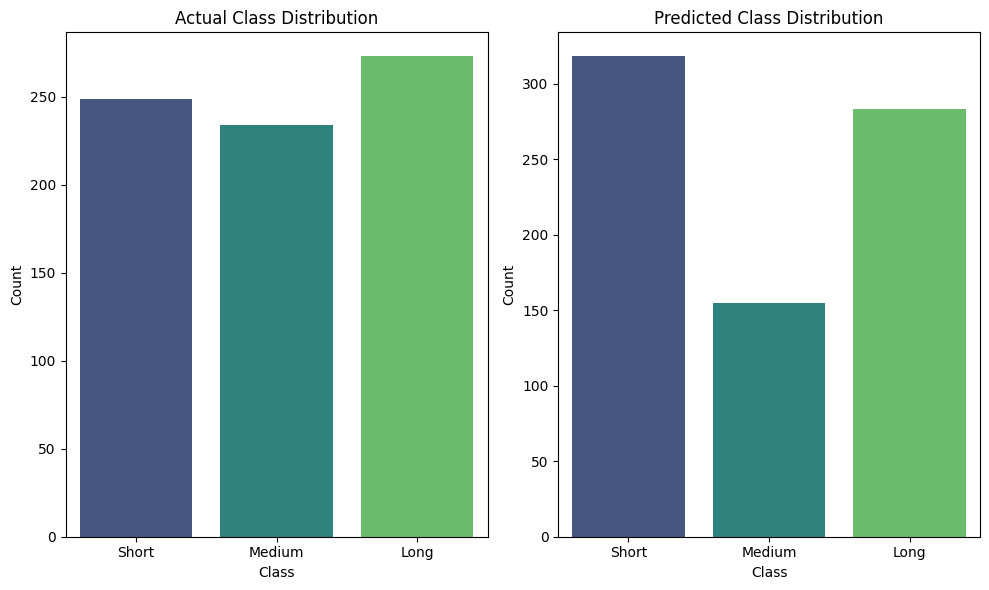

In [49]:
# Plot countplot for actual vs predicted class distribution
vis.plot_countplot(y_test, y_pred, class_names)

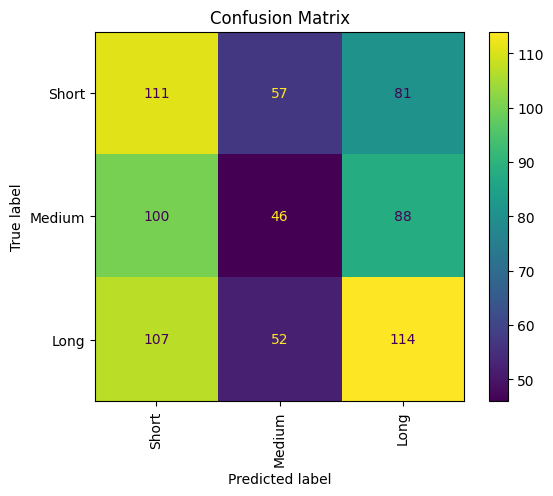

In [50]:
# Plot countplot for actual vs predicted class distribution
vis.plot_confusion_matrix(y_test, y_pred, class_names)

# ---------------------------- END TASK 26 Age & gender Model --------------------------

<br><br>